### 解线性方程组

下面使用四种方法解**AX**=**B**.

方法一：numpy.linalg.solve()解线性方程组。

In [2]:
import numpy as np

m, n = 5,3
A = np.random.rand(m,m)
B = np.random.rand(m,n)
print(np.linalg.solve(A,B))

[[ -2.58691521 -32.35327683 -14.62583719]
 [  2.41692174  36.31208446  17.7219016 ]
 [  5.1835102   23.07569171   9.03629742]
 [ -3.12757631 -13.63944704  -4.89775531]
 [ -1.99925709  -3.81644655  -1.25167695]]


方法二：先求A的逆矩阵，然后计算A逆矩阵和B的乘积。

In [3]:
Ai = np.linalg.inv(A)
print(np.dot(Ai,B))

[[ -2.58691521 -32.35327683 -14.62583719]
 [  2.41692174  36.31208446  17.7219016 ]
 [  5.1835102   23.07569171   9.03629742]
 [ -3.12757631 -13.63944704  -4.89775531]
 [ -1.99925709  -3.81644655  -1.25167695]]


方法三：scipy.linalg,solve()解线性方程。

In [4]:
from scipy import linalg
print(linalg.solve(A,B))

[[ -2.58691521 -32.35327683 -14.62583719]
 [  2.41692174  36.31208446  17.7219016 ]
 [  5.1835102   23.07569171   9.03629742]
 [ -3.12757631 -13.63944704  -4.89775531]
 [ -1.99925709  -3.81644655  -1.25167695]]


方法四：对矩阵A使用LU分解，利用lu_factor()和lu_solve()求解。

In [5]:
luf = linalg.lu_factor(A)
print(linalg.lu_solve(luf,B))

[[ -2.58691521 -32.35327683 -14.62583719]
 [  2.41692174  36.31208446  17.7219016 ]
 [  5.1835102   23.07569171   9.03629742]
 [ -3.12757631 -13.63944704  -4.89775531]
 [ -1.99925709  -3.81644655  -1.25167695]]


### 特征值和特征向量

nxn的矩阵**A**可以看做n维空间的线性变换。若**x**为n维空间中的一个向量，那么**A**和**x**的矩阵乘积就是对**x**进行线性变化后的向量。如果线性变化后的新向量和**x**同一方向，则**x**是线性变化的特征向量，特征向量的长度在线性变化下缩放的比例称为特征值。即如下等式：

$$\bf{Ax}=\lambda \bf{x}$$

式中：A为线性变换，x为特征向量，λ为特征值。

以二维平面上的线性变化矩阵为例，通过linalg.eig()函数计算矩阵A的两个特征值evalues和特征向量evectors,在evectors中每一行均为一特征向量。

In [6]:
A = np.array([[1,-0.3],[-0.1,0.9]])
evalues, evectors = linalg.eig(A)
print(evalues)
print(evectors)

[1.13027756+0.j 0.76972244+0.j]
[[ 0.91724574  0.79325185]
 [-0.3983218   0.60889368]]


In [38]:
print(np.dot(A,evectors[0]))
print(evalues[0]*evectors[0])

[0.67927018 0.62220209]
[0.81152256+0.j 0.7018204 +0.j]


In [10]:
print(np.dot(A,evectors[1]))
print(evalues[1]*evectors[1])

[-0.5809899   0.58783649]
[-0.30659723+0.j  0.46867912+0.j]


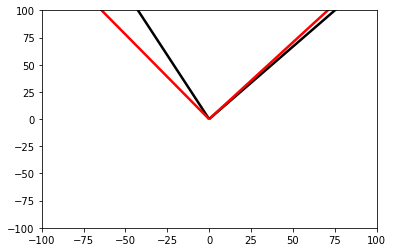

In [50]:
import matplotlib.pyplot as plt
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.quiver(evectors[0][0],evectors[0][1],scale=1)
plt.quiver(np.dot(A,evectors[0])[0],np.dot(A,evectors[0])[1],scale=1,color='red')
plt.quiver(evectors[1][0],evectors[1][1],scale=1)
plt.quiver(np.dot(A,evectors[1])[0],np.dot(A,evectors[1])[1],scale=1,color='red')
plt.show()